In [24]:
import multi_asset_var
from multi_asset_var import var
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [25]:
raw = pd.DataFrame()
raw["CNY"] = pd.read_csv("..\\data\\CNYUSD=X.csv").Close
raw["EUR"] = pd.read_csv("..\\data\\EURUSD=X.csv").Close
returns = raw.pct_change().dropna()

In [26]:
weights = pd.read_csv("..\\data\\wagi.csv")

In [27]:
portfolios = ['real', 'min_risk', 'fixed_return', 'market']

# Metoda historyczna

In [28]:
summary = pd.DataFrame(index=['VaR95', 'VaR95 miesięczny', 'VaR99', 'VaR99 miesięczny'])
for portfolio in portfolios:
    var95 = multi_asset_var.var(returns, np.array(weights[portfolio]), .05, 1)
    var99 = multi_asset_var.var(returns, np.array(weights[portfolio]), .01, 1)
    var95_monthly = multi_asset_var.var(returns, np.array(weights[portfolio]), .05, 20)
    var99_monthly = multi_asset_var.var(returns, np.array(weights[portfolio]), .01, 20)
    summary[portfolio] = [var95, var95_monthly, var99, var99_monthly]

In [29]:
summary.to_csv("..\\data\\var_porfele.csv")
summary

,real,min_risk,fixed_return,market
VaR95,-0.008629,-0.008412,-0.009278,-0.011451
VaR95 miesięczny,-0.040851,-0.039924,-0.043704,-0.053332
VaR99,-0.012144,-0.011836,-0.013063,-0.016139
VaR99 miesięczny,-0.056571,-0.055236,-0.060631,-0.074296


# Metoda parametryczna

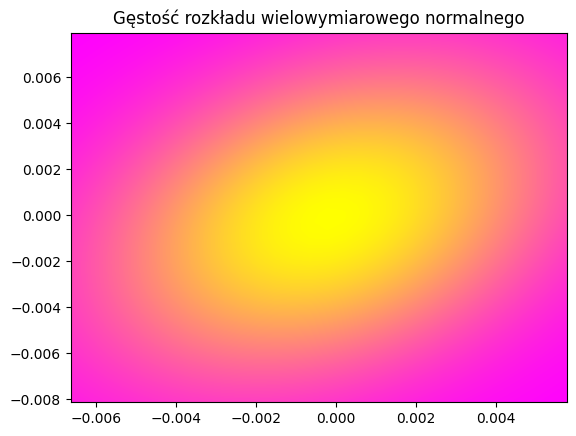

In [30]:
mean, cov = stats.multivariate_normal.fit(returns)
rv = stats.multivariate_normal(mean, cov)
step_cny = (returns.CNY.max() - returns.CNY.min()) / 100
step_eur = (returns.EUR.max() - returns.EUR.min()) / 100
x, y = np.mgrid[returns.CNY.quantile(.05): returns.CNY.quantile(.95): step_cny, returns.EUR.quantile(.05): returns.EUR.quantile(.95): step_eur]
pos = np.dstack((x, y))
plt.contourf(x, y, rv.pdf(pos), cmap='spring', levels=200)
plt.title('Gęstość rozkładu wielowymiarowego normalnego')
plt.savefig("wykresy\\wykres.png")

In [31]:
summary_parametric = pd.DataFrame(
    index=['VaR95', 'VaR95 miesięczny', 'VaR99', 'VaR99 miesięczny']
)
for portfolio in portfolios:
    var95 = var(returns, np.array(weights[portfolio]), .05, 1, mean, cov)
    var99 = var(returns, np.array(weights[portfolio]), .01, 1,  mean, cov)
    var95_monthly = var(returns, np.array(weights[portfolio]), .05, 20, mean, cov)
    var99_monthly = var(returns, np.array(weights[portfolio]), .01, 20, mean, cov)
    summary_parametric[portfolio] = [var95, var95_monthly, var99, var99_monthly]

In [32]:
summary_parametric.to_csv("..\\data\\var_porfele_parametryczna.csv")
summary_parametric

,real,min_risk,fixed_return,market
VaR95,-0.008624,-0.008407,-0.009272,-0.011444
VaR95 miesięczny,-0.040827,-0.039901,-0.043678,-0.053299
VaR99,-0.012137,-0.011828,-0.013054,-0.016128
VaR99 miesięczny,-0.056537,-0.055202,-0.060594,-0.074250
